Processing the image ....

0: 640x416 1 number plate, 63.5ms
Speed: 12.7ms preprocess, 63.5ms inference, 885.7ms postprocess per image at shape (1, 3, 640, 416)
1 Number plate(s) have been detected.
Cropped image saved as: C:\\Users\\Acer nitro 5\\number\\datasets\\cropped\number_plate_20241110_150346_1.png


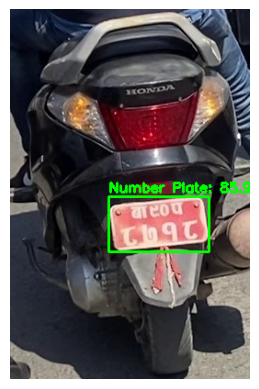

Time to detect and crop number plate: 8182.26 milliseconds


In [1]:
import os
import cv2
import torch
import time
import matplotlib.pyplot as plt
from ultralytics import YOLO
from datetime import datetime

# Constants
CONFIDENCE_THRESHOLD = 0.6
COLOR = (0, 255, 0)
CROP_SAVE_PATH = r"C:\\Users\\Acer nitro 5\\number\\datasets\\cropped"  # Path to save cropped images

# Create cropped folder if it doesn't exist
if not os.path.exists(CROP_SAVE_PATH):
    os.makedirs(CROP_SAVE_PATH)

def detect_and_crop_number_plate(image, model, display=False):
    start = time.time()
    detections = model.predict(image)[0].boxes.data
    
    if detections.shape != torch.Size([0, 6]):
        boxes = []
        confidences = []

        # Loop through detections and filter by confidence
        for detection in detections:
            confidence = detection[4]
            if float(confidence) < CONFIDENCE_THRESHOLD:
                continue
            boxes.append(detection[:4])
            confidences.append(detection[4])

        print(f"{len(boxes)} Number plate(s) have been detected.")
        number_plate_list = []

        for i in range(len(boxes)):
            xmin, ymin, xmax, ymax = int(boxes[i][0]), int(boxes[i][1]), int(boxes[i][2]), int(boxes[i][3])
            number_plate_list.append([xmin, ymin, xmax, ymax])

            # Draw rectangle and label confidence
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), COLOR, 2)
            text = "Number Plate: {:.2f}%".format(confidences[i] * 100)
            cv2.putText(image, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLOR, 2)

            # Crop the detected number plate
            cropped_image = image[ymin:ymax, xmin:xmax]

            # Generate a unique filename using a timestamp and index
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            cropped_filename = os.path.join(CROP_SAVE_PATH, f"number_plate_{timestamp}_{i+1}.png")

            # Save the cropped image
            cv2.imwrite(cropped_filename, cropped_image)
            print(f"Cropped image saved as: {cropped_filename}")

        # Optionally display the image with bounding box
        if display:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')  # Turn off axis for cleaner display
            plt.show()

        end = time.time()
        print(f"Time to detect and crop number plate: {(end - start) * 1000:.2f} milliseconds")

        return number_plate_list
    else:
        print("No number plate has been detected")
        return []

if __name__ == "__main__":
    model = YOLO("C:\\Users\\Acer nitro 5\\number\\code\\runs\\detect\\train\\weights\\best.pt")
    file_path = "C:\\Users\\Acer nitro 5\\number\\datasets\\test\\2024-03-08_23_3.jpg"

    _, file_extension = os.path.splitext(file_path)

    if file_extension in [".jpg", ".jpeg", ".png"]:
        print("Processing the image ....")
        image = cv2.imread(file_path)
        
        # Call the function to detect and crop the number plate
        detect_and_crop_number_plate(image, model, display=True)


In [6]:
import os
import cv2
import torch
import time
import matplotlib.pyplot as plt
from ultralytics import YOLO
from datetime import datetime

# Constants
CONFIDENCE_THRESHOLD = 0.6
COLOR = (0, 255, 0)
CROP_SAVE_PATH = r"C:\\Users\\Acer nitro 5\\number\\datasets\\cropped"  # Path to save cropped images

# Create cropped folder if it doesn't exist
if not os.path.exists(CROP_SAVE_PATH):
    os.makedirs(CROP_SAVE_PATH)

def detect_and_crop_number_plate(image, model, display=False):
    start = time.time()
    detections = model.predict(image)[0].boxes.data
    
    if detections.shape != torch.Size([0, 6]):
        boxes = []
        confidences = []

        # Loop through detections and filter by confidence
        for detection in detections:
            confidence = detection[4]
            if float(confidence) < CONFIDENCE_THRESHOLD:
                continue
            boxes.append(detection[:4])
            confidences.append(detection[4])

        print(f"{len(boxes)} Number plate(s) have been detected.")
        number_plate_list = []

        for i in range(len(boxes)):
            xmin, ymin, xmax, ymax = int(boxes[i][0]), int(boxes[i][1]), int(boxes[i][2]), int(boxes[i][3])
            number_plate_list.append([xmin, ymin, xmax, ymax])

            # Draw rectangle and label confidence
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), COLOR, 2)
            text = "Number Plate: {:.2f}%".format(confidences[i] * 100)
            cv2.putText(image, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLOR, 2)

            # Crop the detected number plate
            cropped_image = image[ymin:ymax, xmin:xmax]

            # Generate a unique filename using a timestamp and index
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            cropped_filename = os.path.join(CROP_SAVE_PATH, f"number_plate_{timestamp}_{i+1}.png")

            # Save the cropped image
            cv2.imwrite(cropped_filename, cropped_image)
            print(f"Cropped image saved as: {cropped_filename}")

        # Optionally display the image with bounding box
        if display:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')  # Turn off axis for cleaner display
            plt.show()

        end = time.time()
        print(f"Time to detect and crop number plate: {(end - start) * 1000:.2f} milliseconds")

        return number_plate_list
    else:
        print("No number plate has been detected")
        return []

if __name__ == "__main__":
    model = YOLO("C:\\Users\\Acer nitro 5\\number\\code\\runs\\detect\\train\\weights\\best.pt")
    file_path = "C:\\Users\\Acer nitro 5\\number\\datasets\\test\\test9.jpg"

    _, file_extension = os.path.splitext(file_path)

    if file_extension in [".jpg", ".jpeg", ".png"]:
        print("Processing the image ....")
        image = cv2.imread(file_path)
        
        # Call the function to detect and crop the number plate
        detect_and_crop_number_plate(image, model, display=True)


Processing the image ....

0: 640x480 (no detections), 62.9ms
Speed: 4.2ms preprocess, 62.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
No number plate has been detected
